In [ ]:
compitation_link =  "https://www.kaggle.com/competitions/spaceship-titanic"

In [350]:
import pandas as pd

import numpy as np

from sklearn.pipeline import Pipeline 

from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer 

from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import OneHotEncoder , LabelEncoder

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.base import BaseEstimator , TransformerMixin

from sklearn.model_selection import train_test_split


In [351]:
data = pd.read_csv(r"C:\codes\python\PycharmProjects\skleearn\space_titanic_train.csv")

test_data = pd.read_csv(r"C:\codes\python\PycharmProjects\skleearn\space_titanic_test.csv")
data[['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported']]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [352]:
data.replace([True,False],[1,0],inplace=True)
test_data.replace([True,False],[1,0],inplace=True)

In [353]:
data.drop(["FoodCourt","ShoppingMall",'Transported'],axis='columns')
test_data.drop(["FoodCourt","ShoppingMall"],axis='columns')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,Spa,VRDeck,Name
0,0013_01,Earth,1.0,G/3/S,TRAPPIST-1e,27.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,0.0,F/4/S,TRAPPIST-1e,19.0,0.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,1.0,C/0/S,55 Cancri e,31.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,0.0,C/1/S,TRAPPIST-1e,38.0,0.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,0.0,F/5/S,TRAPPIST-1e,20.0,0.0,10.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,1.0,G/1496/S,TRAPPIST-1e,34.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,0.0,NaN,TRAPPIST-1e,42.0,0.0,0.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,1.0,D/296/P,55 Cancri e,NaN,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,0.0,D/297/P,NaN,NaN,0.0,0.0,0.0,523.0,Kitakan Conale


<Axes: >

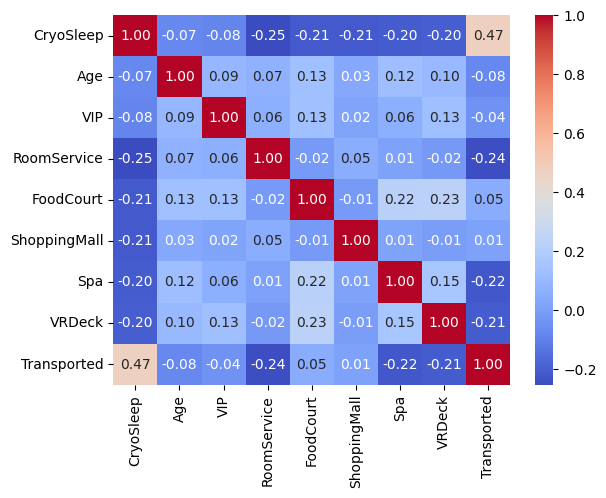

In [354]:
mat = data.corr(numeric_only=True)
sns.heatmap(mat,annot=True,fmt='0.2f',cmap = 'coolwarm')

In [355]:
for i in data.columns:

    if(data[i].dtype == 'object'):
        print(f"{i} : {len(data[i].value_counts())}")

PassengerId : 8693
HomePlanet : 3
Cabin : 6560
Destination : 3
Name : 8473


In [356]:
x = data.drop(['FoodCourt','ShoppingMall','Cabin','PassengerId',"Name",'Transported'],axis = 'columns')

test_x = test_data.drop(['FoodCourt','ShoppingMall','Cabin','PassengerId',"Name"],axis = 'columns')

y = data['Transported']

In [357]:
num_columns = []
obj_columns = []
for i in x.columns:

    if data[i].dtype == 'object':

        obj_columns.append(i)

    else:

        num_columns.append(i)


obj_columns , num_columns

(['HomePlanet', 'Destination'],
 ['CryoSleep', 'Age', 'VIP', 'RoomService', 'Spa', 'VRDeck'])

In [358]:
class encode(BaseEstimator,TransformerMixin):

    def fit(self,X,Y=None) -> None:

        return self
    
    
    def transform(self,X):

        n = X.shape[-1]

        
        for i in range(n):
        
            X[:,i] = LabelEncoder().fit_transform(X[:,i])
        
        return X
    




In [359]:
num_pipe = Pipeline(steps = [('impute' , SimpleImputer(strategy = 'mean', fill_value = np.nan)) ,
                            ('scale' , MinMaxScaler() ) ])

obj_pipe = Pipeline(steps= [ ('impute' , SimpleImputer(strategy= 'most_frequent' , fill_value= np.nan)),
                              ('encode',encode())]) 

In [360]:
""""remainder=’drop’ is specified to ignore other columns in a dataframe.

n_job = -1 means that we'll be using all processors to run in parallel"""

col_pipe = ColumnTransformer(transformers= [('num_pipe',num_pipe,num_columns),
                                                     ('obj_pipe',obj_pipe,obj_columns)],
                                                     n_jobs= -1 , 
                                                     remainder= 'drop'                 
                                                     )

In [361]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

grid_param = [{'n_estimators' : [10,100,324,500],'max_depth' : [None,5,10,15] , 'min_samples_split' : [None,2,4,3]}]

RFC = GridSearchCV(RandomForestClassifier() , param_grid= grid_param , return_train_score=True,verbose=3)

In [362]:
from sklearn.neighbors import KNeighborsClassifier

model = Pipeline(steps= [('preprocessing' , col_pipe),
 ('model',KNeighborsClassifier(10))
    
])

In [363]:
model.fit(x,y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num_pipe',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(fill_value=nan)),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['CryoSleep', 'Age', 'VIP',
                                                   'RoomService', 'Spa',
                                                   'VRDeck']),
                                                 ('obj_pipe',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(fill_value=nan,
                                                                                 strategy='most_frequent')),
                                                                  ('encode',
                                                                   encode())]),
                                                  ['HomePlanet',
                                                   'Destination'])])),
                ('model', KNeighborsClassifier(n_neighbors=10))])

In [364]:
pred = model.predict(test_x)

In [365]:
pred = [True if(i==1) else False for i in pred]

In [366]:
pred

[True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 False

In [367]:
submission = pd.DataFrame({'PassengerId' : test_data['PassengerId'], 'Transported':pred})

In [370]:
submission.to_csv('space_titinic_submission.csv',index=False)